In [718]:
import numpy as np
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy

# Линейная регрессия

Генерируем данные и выводим их на графике

In [770]:
m = 100
a, b = 0, 10
X = a + b * np.random.rand(m, 1)
X_b = np.c_[np.ones((m, 1)), X]
thetas = np.array([8, -6]).reshape(-1, 1)
y = X_b.dot(thetas) + np.random.randn(m, 1)

Text(0, 0.5, 'Y')

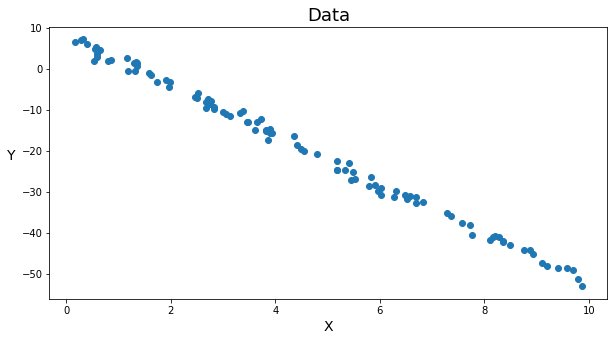

In [771]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.title('Data', fontsize=18)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)

## Нормальное уравнение

Добавляем столбец единиц к матрице X

In [772]:
X2 = np.c_[np.ones((m, 1)), X]

Находим вектор параметров через нормальное уравнение

In [773]:
predict_thetas = np.linalg.pinv(X2.T.dot(X2)).dot(X2.T).dot(y)
predict_thetas

array([[ 7.96840438],
       [-6.02320673]])

Строим линию регрессии по заданным X и предсказанным Y

In [774]:
X_new = np.array([[a], [b]])
y_predict = np.c_[np.ones((2, 1)), X_new].dot(predict_thetas)

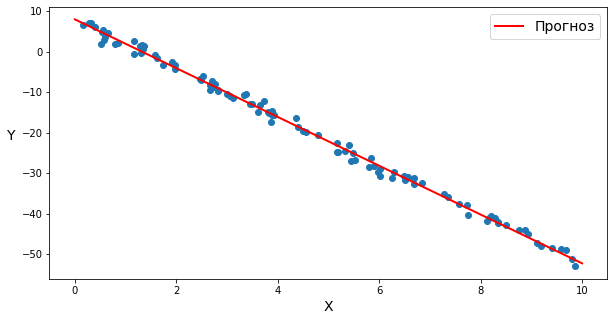

In [775]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Прогноз')
plt.legend(loc="upper right", fontsize=14)

Сравним результаты с аналогичным методом из Scikit-Learn

In [776]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

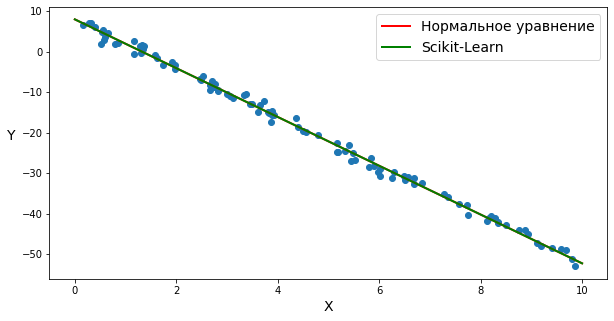

In [777]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
plt.plot(X_new, y_predict, 'r-', linewidth=2, label='Нормальное уравнение')
plt.plot(X_new, lr.predict(X_new), 'g-', linewidth=2, label='Scikit-Learn')
plt.legend(loc="upper right", fontsize=14)

In [778]:
error_normal_equation = np.sqrt(mean_squared_error(thetas, predict_thetas))
error_sklearn_lr = np.sqrt(mean_squared_error(thetas, np.vstack([lr.intercept_, lr.coef_])))

In [779]:
error_sklearn_lr - error_normal_equation

-3.4274666438349755e-14

## Градиентный спуск

### Пакетный градиентный спуск

In [780]:
def butch_gd(X, y, n_iterations=1000, eta=0.01, thetas_buf=None):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    for i in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

In [785]:
butch_gd(X, y)

array([[ 7.93439858],
       [-6.01772496]])

#### Графическая демонстрация пакетного градиентного спуска 

In [817]:
def draw_plot_gd(X, y, n_iterations=1000, n_lines=5, eta=0.01):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
    plt.axis([0, 2, -5, 8])
    
    X_new = np.array([[a], [b]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    
    line_iters = np.linspace(0, 1000-1, n_lines, dtype=int)
    
    for i in range(n_iterations):
        y_predict = X_new_b.dot(thetas)

        if i in line_iters:
            plt.plot(X_new, y_predict, 'g-', linewidth=1) 
        if i == n_iterations-1:
            plt.plot(X_new, y_predict, 'r--', linewidth=2, label='Прогноз')
                
        gradients = 2/m * X_b.T.dot(X_b.dot(thetas) - y)
        thetas -= eta * gradients
        
    plt.legend(loc="upper right", fontsize=14)

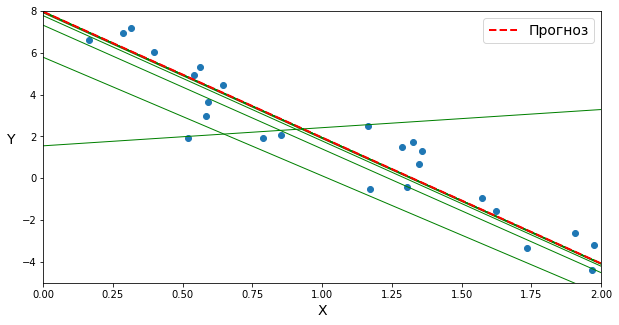

In [818]:
draw_plot_gd(X, y, n_iterations=10000, n_lines=10, eta=0.02)

### Мини-пакетный градиентный спуск

In [788]:
def mini_butch_gd(X, y, n_iterations=1000, eta=0.01, size=0.01, thetas_buf=None):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    indexes = list(range(m))
    size_minibatch = int(size * m)
    
    for i in range(n_iterations):
        sample = random.sample(indexes, size_minibatch)
        minibatch_X = X_b[sample]
        minibatch_y = y[sample]
        gradients = 2/size_minibatch * minibatch_X.T.dot(minibatch_X.dot(thetas) - minibatch_y)
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

In [789]:
mini_butch_gd(X, y, n_iterations=1000, size=0.5)

array([[ 7.93296628],
       [-6.0264616 ]])

#### Графическая демонстрация мини-пакетного градиентного спуска 

In [815]:
def draw_plot_gd(X, y, n_iterations=1000, n_lines=5, eta=0.01, size=0.01):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    indexes = list(range(m))
    size_minibatch = int(size * m)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
    plt.axis([0, 2, -5, 8])
    
    X_new = np.array([[a], [b]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    
    line_iters = np.linspace(0, 1000-1, n_lines, dtype=int)
    
    for i in range(n_iterations):
        y_predict = X_new_b.dot(thetas)

        if i in line_iters:
            plt.plot(X_new, y_predict, 'g-', linewidth=1) 
        if i == n_iterations-1:
            plt.plot(X_new, y_predict, 'r--', linewidth=2, label='Прогноз')
            
        sample = random.sample(indexes, size_minibatch)
        minibatch_X = X_b[sample]
        minibatch_y = y[sample]
        gradients = 2/size_minibatch * minibatch_X.T.dot(minibatch_X.dot(thetas) - minibatch_y)
        thetas -= eta * gradients
                 
    plt.legend(loc="upper right", fontsize=14)

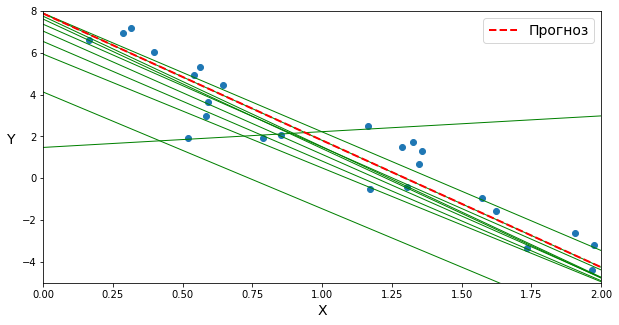

In [816]:
draw_plot_gd(X, y, n_lines=10)

### Стохастический градиентный спуск

Функция, которая определяет скорость обучения на каждой итерации, называется
графиком обучения (learning schedule)

In [792]:
def sgd(X, y, n_iterations=1000, eta=0.01, thetas_buf=None):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    for i in range(n_iterations):
        random_index = np.random.randint(0, m)
        xi = X_b[random_index].reshape(1, -1)
        yi = y[random_index]
        
        gradients = 2 * xi.T.dot(xi.dot(thetas) - yi)
        thetas -= eta * gradients
        
        if thetas_buf is not None:
            thetas_buf.append(deepcopy(thetas.ravel()))
    
    return thetas

In [793]:
sgd(X, y, 1000)

array([[ 8.04293252],
       [-5.88529552]])

#### Графическая демонстрация стохастического градиентного спуска 

In [825]:
def draw_plot_gd(X, y, n_iterations=1000, n_lines=5, eta=0.01):
    thetas = np.random.uniform(0, 2, (2, 1))
    m = X.shape[0]
    X_b = np.c_[np.ones((m, 1)), X]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', rotation=0, fontsize=14, labelpad=10)
    plt.axis([0, 2, -5, 8])
    
    X_new = np.array([[a], [b]])
    X_new_b = np.c_[np.ones((2, 1)), X_new]
    
    line_iters = np.linspace(0, 1000-1, n_lines, dtype=int)
    
    for i in range(n_iterations):
        y_predict = X_new_b.dot(thetas)

        if i in line_iters:
            plt.plot(X_new, y_predict, 'g-', linewidth=1) 
        if i == n_iterations-1:
            plt.plot(X_new, y_predict, 'r--', linewidth=2, label='Прогноз')
            
        random_index = np.random.randint(0, m)
        xi = X_b[random_index].reshape(1, -1)
        yi = y[random_index]
        
        gradients = 2 * xi.T.dot(xi.dot(thetas) - yi)
        thetas -= eta * gradients
                 
    plt.legend(loc="upper right", fontsize=14)

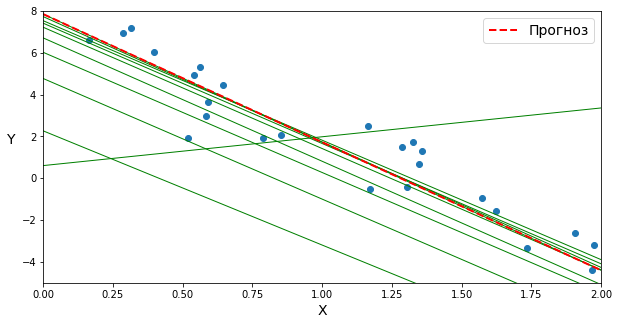

In [826]:
draw_plot_gd(X, y, n_lines=10)

### Сравнение

In [796]:
def get_path_gd(X, y, n_iterations=1000, eta=0.01, size=0.01):
    bgd_thetas = []
    mgd_thetas = []
    sgd_thetas = []
    
    butch_gd(X, y, n_iterations=n_iterations, eta=eta, thetas_buf=bgd_thetas)
    mini_butch_gd(X, y, n_iterations=n_iterations, eta=eta, size=size, thetas_buf=mgd_thetas)
    sgd(X, y, n_iterations=n_iterations, eta=eta, thetas_buf=sgd_thetas)
    
    return bgd_thetas, mgd_thetas, sgd_thetas

In [859]:
def print_gds(thetas, etalon_thetas):
    bgd_thetas = np.vstack(thetas[0]) 
    mgd_thetas = np.vstack(thetas[1]) 
    sgd_thetas = np.vstack(thetas[2])
    
    plt.figure(figsize=(10, 10))
    plt.xlabel(r"$\theta_0$", fontsize=14)
    plt.ylabel(r"$\theta_1$", rotation=0, fontsize=14, labelpad=10)
    plt.axis([-1, 9, -7, -3])
    
    plt.plot(bgd_thetas[:, 0], bgd_thetas[:, 1], "r-s", linewidth=1, label="Butch GD")
    plt.plot(mgd_thetas[:, 0], mgd_thetas[:, 1], "g-+", linewidth=1, label="Mini-Butch GD")
    plt.plot(sgd_thetas[:, 0], sgd_thetas[:, 1], "b-o", linewidth=1, label="SGD")
    plt.scatter(etalon_thetas[0], etalon_thetas[1], color='black', s=2)
    
    plt.legend(loc="upper right", fontsize=14)

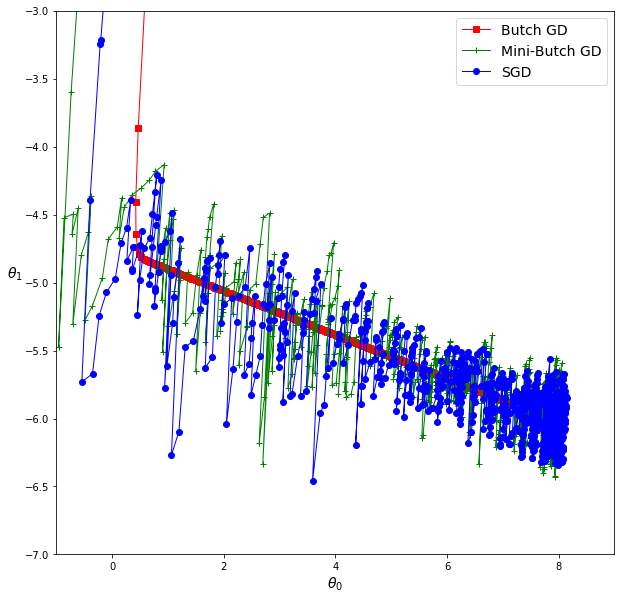

In [860]:
print_gds(get_path_gd(X, y, n_iterations=1000), etalon_thetas=thetas.ravel())

In [843]:
thetas.ravel()

array([ 8, -6])